Ridge regression, also known as Tikhonov regularization, is a technique used for analyzing multiple regression data that suffer from multicollinearity. When independent variables are highly correlated, classical linear regression models' estimates can become imprecise, and the variance of the coefficient estimates can inflate significantly. Ridge regression addresses this issue by adding a degree of bias to the regression estimates, thereby reducing standard errors.

### Overview of Ridge Regression

The primary objective of ridge regression is to minimize the sum of the square of residuals like in ordinary least squares (OLS) regression, but with an added penalty on the size of coefficients. This penalty is the L2-norm (Euclidean norm) of the coefficients, leading to the following cost function:

\[
\min_{\beta} \left\{ \sum_{i=1}^{n} (y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{p} \beta_j^2 \right\}
\]

where \(y_i\) are the responses, \(x_{ij}\) are the predictors, \(\beta_j\) are the coefficients to be estimated, \(\lambda\) is the tuning parameter that controls the amount of shrinkage applied to the coefficients, \(n\) is the number of observations, and \(p\) is the number of predictors.

### When to Use Ridge Regression

- **Multicollinearity**: Ridge regression is particularly useful when there is a high degree of multicollinearity in the data, as it helps in stabilizing the coefficient estimates.
- **Bias-Variance Trade-off**: When you're dealing with overfitting due to a large number of predictors, ridge regression can help in reducing model variance at the cost of a slight increase in bias, which can result in a model with better prediction accuracy on unseen data.
- **Model Selection is not a Priority**: Unlike LASSO, which can reduce some coefficients to zero and thus perform variable selection, ridge regression will shrink coefficients close to zero but not exactly to zero. It is preferred when the goal is prediction accuracy, and all predictors are believed to be relevant or when you do not need to specifically identify which variables are most important.

### Ridge vs. LASSO

- **Penalty Term**: The key difference between Ridge and LASSO lies in the penalty term. Ridge regression uses the square of the magnitude of coefficients as its penalty term (\(\lambda \sum \beta_j^2\)), whereas LASSO uses the absolute value (\(\lambda \sum |\beta_j|\)). This difference has significant implications for the behavior of the two methods.
- **Variable Selection**: LASSO can set some coefficients to zero, effectively performing variable selection, which is helpful when it's believed that many predictors are irrelevant or redundant. Ridge regression, however, shrinks the coefficients towards zero but never exactly to zero.
- **Usage Scenario**: Ridge is preferable when most variables contribute to the response or when multicollinearity is present, and the number of predictors is large compared to the number of observations. LASSO is more suitable when the goal includes variable reduction/selection, or you suspect that only a subset of predictors are truly important.
- **Tuning Parameter (\(\lambda\))**: Both methods require the choice of a tuning parameter \(\lambda\), which can significantly affect the performance of the model. This parameter is usually selected via cross-validation.

In summary, the choice between Ridge and LASSO depends on the specific goals of your analysis (e.g., prediction accuracy vs. variable selection) and the characteristics of your data (e.g., the presence of multicollinearity or the number of predictors relative to observations).

## Example

To illustrate how to use Ridge regression in R, we'll again use the `glmnet` package, which provides functionalities for fitting both Ridge and LASSO models. The example will follow a simple workflow: generating synthetic data, fitting a Ridge regression model, and selecting the best lambda value using cross-validation.

### Step 1: Install and Load the `glmnet` Package

In [2]:
library(glmnet)

Loading required package: Matrix



Loaded glmnet 4.1-8



### Step 2: Generate Synthetic Data

Let's create a synthetic dataset for demonstration purposes:

In [3]:
set.seed(42) # For reproducibility
n <- 100 # Number of observations
p <- 10  # Number of predictors


n <- 1000

# Create a common time variable from 1 to n
time <- seq(1, n, by = 1)

# Generate sine waves of different frequencies
X1 <- sin(2 * pi * time / 1200)  # Base sine wave
X2 <- sin(2 * pi * time / 50)   # Higher frequency sine wave
X3 <- sin(2 * pi * time / 400)  # Lower frequency sine wave

# Introduce multicollinearity by combining sine waves
X4 <- X1 + 0.5 * X2 + rnorm(n, mean = 0, sd = 0.1)  # Combination of X1 and X2 with noise
X5 <- X1 + 0.5 * X3 + rnorm(n, mean = 0, sd = 0.1)  # Combination of X1 and X3 with noise
X6 <- X2 + 0.5 * X3 + rnorm(n, mean = 0, sd = 0.1)  # Combination of X2 and X3 with noise

# Additional independent variables with less correlation
X7 <- rnorm(n, mean = 0, sd = 1)
X8 <- runif(n, min = -1, max = 1)
X9 <- rbinom(n, size = 1, prob = 0.5)
X10 <- rpois(n, lambda = 3)

# Combine variables into a data frame
data <- data.frame(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)

X <- data.matrix(data)
beta <- c(1, 2, -1.5, rep(0, p-3)) # True coefficients
y <- X %*% beta + rnorm(n) # Generate response


In [4]:
set.seed(42) # For reproducibility
n <- 100 # Number of observations
p <- 20  # Number of predictors

X <- matrix(rnorm(n * p), n, p) # Predictor matrix
beta <- c(1, 2, -1.5, rep(0, p-3)) # True coefficients
y <- X %*% beta + rnorm(n) # Generate response

In this dataset, only the first three predictors have a non-zero relationship with the response variable `y`.

### Step 3: Fit a Ridge Regression Model

With `glmnet`, fitting a Ridge regression model requires specifying the alpha parameter as 0 (since `alpha = 1` corresponds to LASSO and `alpha = 0` corresponds to Ridge).


In [5]:
# Convert X to a sparse matrix format expected by glmnet
X_matrix <- as.matrix(X)

# Fit Ridge regression model
ridge_model <- glmnet(X_matrix, y, alpha = 0)

### Step 4: Cross-validation to Choose Lambda

The `cv.glmnet` function can be used to perform k-fold cross-validation (default is 10-fold) to find the optimal value of lambda (\(\lambda\)) that minimizes the cross-validation error.

This plot shows the mean squared error as a function of log(\(\lambda\)), along with error bars for each value of \(\lambda\). The value of \(\lambda\) that minimizes the cross-validation error is considered optimal.

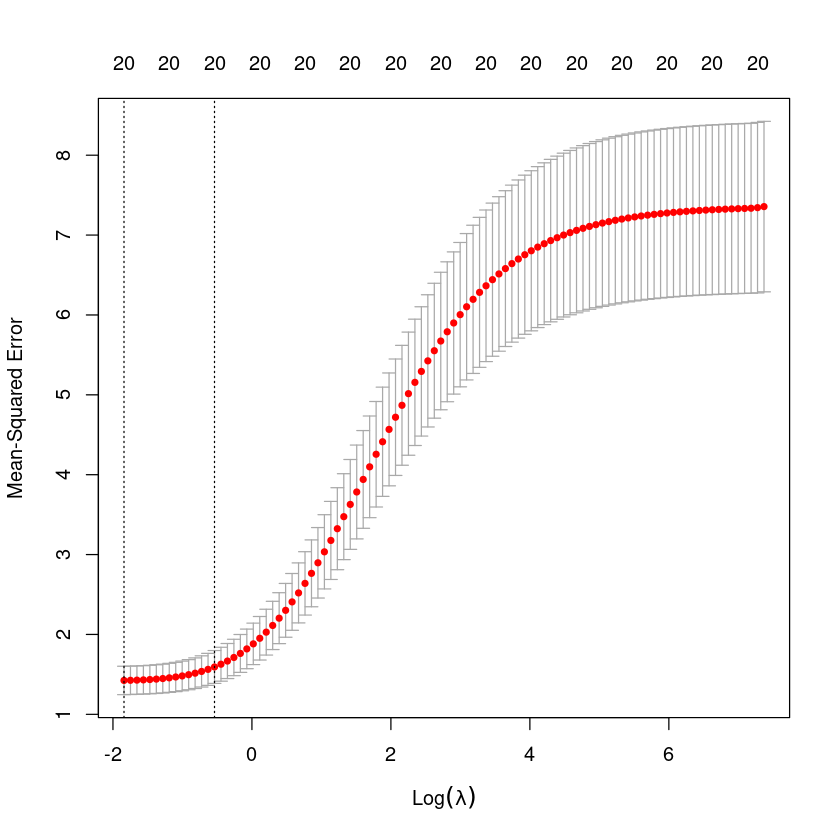

In [6]:
set.seed(42) # For reproducibility
cv_ridge <- cv.glmnet(X_matrix, y, alpha = 0)

# Plot the cross-validation curve
plot(cv_ridge)

### Step 5: Extract the Coefficients at Optimal Lambda

You can extract the coefficients of the model fitted with the optimal lambda value:

In [7]:
best_lambda <- cv_ridge$lambda.min
ridge_coeff <- coef(cv_ridge, s = best_lambda)
print(ridge_coeff)

21 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) -0.07745817
V1           0.91826154
V2           1.65235372
V3          -1.46710044
V4          -0.19700698
V5           0.04381378
V6           0.05494364
V7           0.09253104
V8          -0.01906572
V9           0.16346843
V10          0.03494002
V11         -0.06098556
V12         -0.02168706
V13         -0.21856057
V14         -0.03995930
V15          0.08606971
V16          0.11247663
V17          0.04264443
V18          0.08292877
V19          0.01357294
V20         -0.12791212


### Step 6: Make Predictions

You can make predictions using the `predict` function and the model fitted with the optimal lambda:


In [8]:
predictions <- predict(cv_ridge, s = best_lambda, newx = as.matrix(X))

This example covers generating synthetic data, fitting a Ridge regression model, performing cross-validation to select the optimal lambda, extracting the coefficients, and making predictions. Ridge regression is a powerful technique for handling multicollinearity and improving model generalization, especially in scenarios where the number of predictors is large relative to the number of observations.

## Multicollinearity

Multicollinearity refers to a situation in statistical modeling where two or more predictor variables in a multiple regression model are highly correlated, meaning that one predictor variable can be linearly predicted from the others with a substantial degree of accuracy. In practical terms, this means that the independent variables are not truly independent from each other, which can cause several problems in the regression analysis, including:

1. **Increased Variance in Coefficient Estimates**: Multicollinearity can lead to large variances and covariances for the coefficient estimates, making the estimates very sensitive to changes in the model or the data. This high variance can inflate the standard errors of the coefficients, leading to wider confidence intervals and making it harder to determine if a variable is statistically significant.

2. **Unstable Coefficient Estimates**: The regression coefficients may change erratically in response to small changes in the model or the data. Small changes in the input data can lead to large changes in the model, even reversing signs of coefficients.

3. **Difficulty in Interpreting Coefficients**: With multicollinearity, it becomes challenging to discern the individual impact of correlated predictors on the dependent variable because changes in one predictor are associated with changes in another.

### Does Multicollinearity Affect the Bias-Variance Trade-Off?

Multicollinearity primarily affects the variance part of the bias-variance trade-off, without directly influencing the bias. Here's how:

- **Variance**: In the presence of multicollinearity, the variance of the coefficient estimates increases. This means that the model becomes more sensitive to small fluctuations in the training data, which can lead to overfitting. In models affected by multicollinearity, even if the overall model might seem good at predicting the training data (low bias), the high variance in the coefficient estimates can make the model perform poorly on unseen data.

- **Bias**: Multicollinearity itself does not introduce bias into the coefficient estimates; the estimates are still unbiased. The problem arises because the high variance makes the estimates less reliable.

### Dealing with Multicollinearity

To manage multicollinearity and its impact on the variance of estimates, analysts can use several strategies:

1. **Removing Highly Correlated Predictors**: By manually reviewing the correlations between variables and removing some of the highly correlated ones, you can reduce multicollinearity.

2. **Principal Component Regression (PCR)**: This approach transforms the predictors into a set of linearly uncorrelated components, which can then be used in the regression analysis.

3. **Ridge Regression**: This method adds a penalty equal to the square of the magnitude of coefficients to the loss function, effectively reducing the variance at the cost of introducing a small bias. This can be particularly helpful in the context of multicollinearity because it dampens the impact of highly correlated variables.

In summary, while multicollinearity primarily affects the variance component of the bias-variance trade-off, strategies like ridge regression can be used to balance this trade-off by introducing a small amount of bias to significantly reduce variance, leading to models that generalize better to unseen data.

## Testing for multicollinearity

Is an essential step in the data preprocessing phase, especially before performing linear regression analysis. Multicollinearity can significantly affect the stability and interpretation of the regression coefficients. Several methods and indicators can help detect multicollinearity:

### 1. Correlation Matrix
A simple and initial check involves calculating the correlation coefficients between all pairs of independent variables. High correlation coefficients (either positive or negative) suggest potential multicollinearity.

Look for pairs of variables with a correlation coefficient higher than 0.8 or lower than -0.8 as a basic rule of thumb, although these thresholds can be adjusted based on the context.

In [9]:
# Load necessary library
library(MASS)

# Set the seed for reproducibility
set.seed(123)

# Number of observations
n <- 100

# Generate independent variables
X1 <- rnorm(n, mean = 50, sd = 10)
X2 <- X1 + rnorm(n, mean = 0, sd = 5)  # X2 is highly correlated with X1
X3 <- rnorm(n, mean = 0, sd = 10) + 0.5*X1  # X3 is somewhat correlated with X1
X4 <- rnorm(n, mean = 20, sd = 5)
X5 <- X4 + rnorm(n, mean = 0, sd = 3)  # X5 is highly correlated with X4
X6 <- runif(n, min = 10, max = 20)
X7 <- runif(n, min = 5, max = 15) + 0.2*X6  # X7 is somewhat correlated with X6
X8 <- rbinom(n, size = 1, prob = 0.5)
X9 <- X8 + rnorm(n, mean = 0, sd = 1)  # X9 is correlated with X8
X10 <- rpois(n, lambda = 3)

# Combine variables into a data frame
data <- data.frame(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)

# Check correlations
correlations <- cor(data)
print(correlations)

cor_matrix <- cor(X_matrix)
print(cor_matrix)

             X1          X2          X3          X4          X5          X6
X1   1.00000000  0.87869927  0.33394450 -0.04407900 -0.13500951  0.13154499
X2   0.87869927  1.00000000  0.30442280 -0.01882534 -0.13472247  0.20438815
X3   0.33394450  0.30442280  1.00000000 -0.06277976 -0.11081993 -0.02232892
X4  -0.04407900 -0.01882534 -0.06277976  1.00000000  0.86589491  0.02946546
X5  -0.13500951 -0.13472247 -0.11081993  0.86589491  1.00000000 -0.01470961
X6   0.13154499  0.20438815 -0.02232892  0.02946546 -0.01470961  1.00000000
X7   0.11976253  0.13231461 -0.06673455 -0.26959355 -0.20274853  0.20698945
X8  -0.03028643 -0.03105926  0.07184080  0.03817934 -0.03611747 -0.05881783
X9   0.12986452  0.09844543  0.26658629 -0.07815146 -0.07665171 -0.15432624
X10  0.08472669  0.08173646  0.09509629 -0.00115353 -0.01281856 -0.02157935
             X7          X8          X9         X10
X1   0.11976253 -0.03028643  0.12986452  0.08472669
X2   0.13231461 -0.03105926  0.09844543  0.08173646
X3  -0.0

 [1] 1.00 0.50 0.20 0.03 0.03 0.03 0.30 0.01 0.01 0.01
              X1           X2          X3           X4           X5
X1   1.000000000 -0.105818615  0.03427391  0.888985488  0.895279366
X2  -0.105818615  1.000000000 -0.03079385  0.343637134 -0.109209884
X3   0.034273914 -0.030793853  1.00000000  0.019491329  0.459097793
X4   0.888985488  0.343637134  0.01949133  1.000000000  0.791263183
X5   0.895279366 -0.109209884  0.45909779  0.791263183  1.000000000
X6  -0.084325995  0.880730585  0.42887884  0.311138064  0.107570629
X7  -0.003663075 -0.008648118  0.01443306 -0.007611113  0.002049737
X8  -0.019853989 -0.007994919 -0.02840553 -0.021701580 -0.028901258
X9  -0.022160720  0.018627722  0.01179737 -0.010509171 -0.012368412
X10  0.008781953  0.009063163 -0.01476997  0.007605767  0.010058615
               X6           X7           X8          X9           X10
X1  -0.0843259955 -0.003663075 -0.019853989 -0.02216072  0.0087819525
X2   0.8807305854 -0.008648118 -0.007994919  0.01862772  

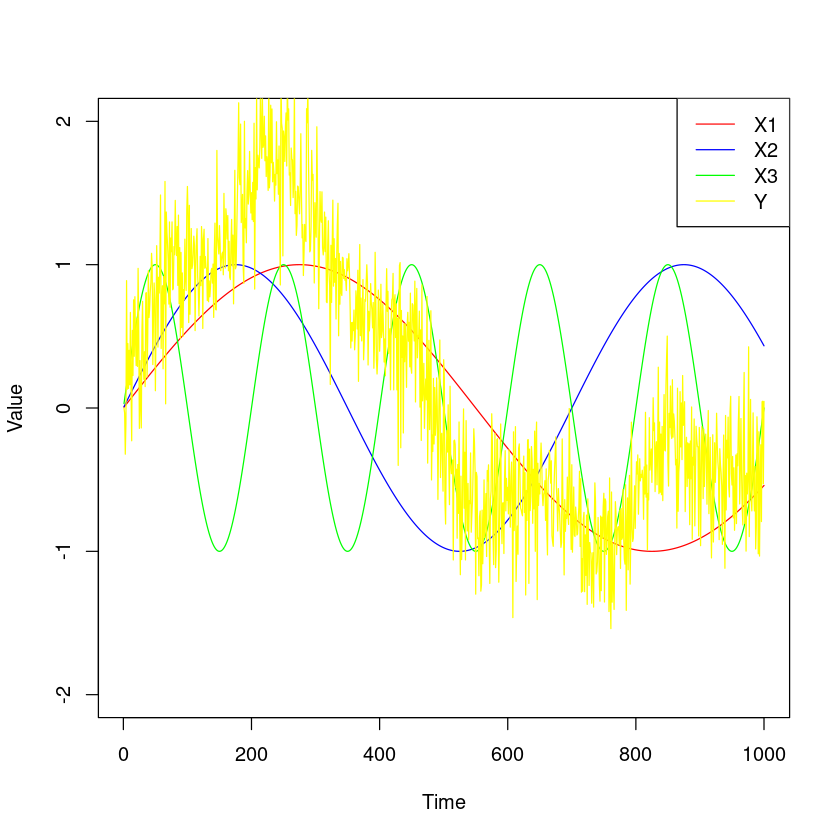

In [45]:
# Set the seed for reproducibility
set.seed(123)

# Define the number of observations
p <- 10
n <- 1000

# Create a common time variable from 1 to n
time <- seq(1, n, by = 1)

# Generate sine waves of different frequencies
X1 <- sin(2 * pi * time / 1100)  # Base sine wave
X2 <- sin(2 * pi * time / 700)   # Higher frequency sine wave
X3 <- sin(2 * pi * time / 200)  # Lower frequency sine wave

# Introduce multicollinearity by combining sine waves
X4 <- X1 + 0.5 * X2 + rnorm(n, mean = 0, sd = 0.1)  # Combination of X1 and X2 with noise
X5 <- X1 + 0.5 * X3 + rnorm(n, mean = 0, sd = 0.1)  # Combination of X1 and X3 with noise
X6 <- X2 + 0.5 * X3 + rnorm(n, mean = 0, sd = 0.1)  # Combination of X2 and X3 with noise

# Additional independent variables with less correlation
X7 <- rnorm(n, mean = 0, sd = 1)
X8 <- runif(n, min = -1, max = 1)
X9 <- rbinom(n, size = 1, prob = 0.5)
X10 <- rpois(n, lambda = 3)

# Combine variables into a data frame
data <- data.frame(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10)
X <- data.matrix(data)
beta <- c( 1., 0.5 , .2,  0.03,  0.03,  0.03, 0.3,  0.01,  0.01,  0.01) # True coefficients
print(beta)
Y <- X %*% beta # Generate response

# Check correlations
correlations <- cor(data)
print(correlations)

# Optional: Plot the sine waves to visualize their correlation
plot(time, X1, type = 'l', col = 'red', ylim = c(-2, 2), ylab = "Value", xlab = "Time")
lines(time, X2, col = 'blue')
lines(time, X3, col = 'green')
lines(time, Y, col = 'yellow')
legend("topright", legend = c("X1", "X2", "X3", "Y"), col = c("red", "blue", "green", "yellow"), lty = 1)


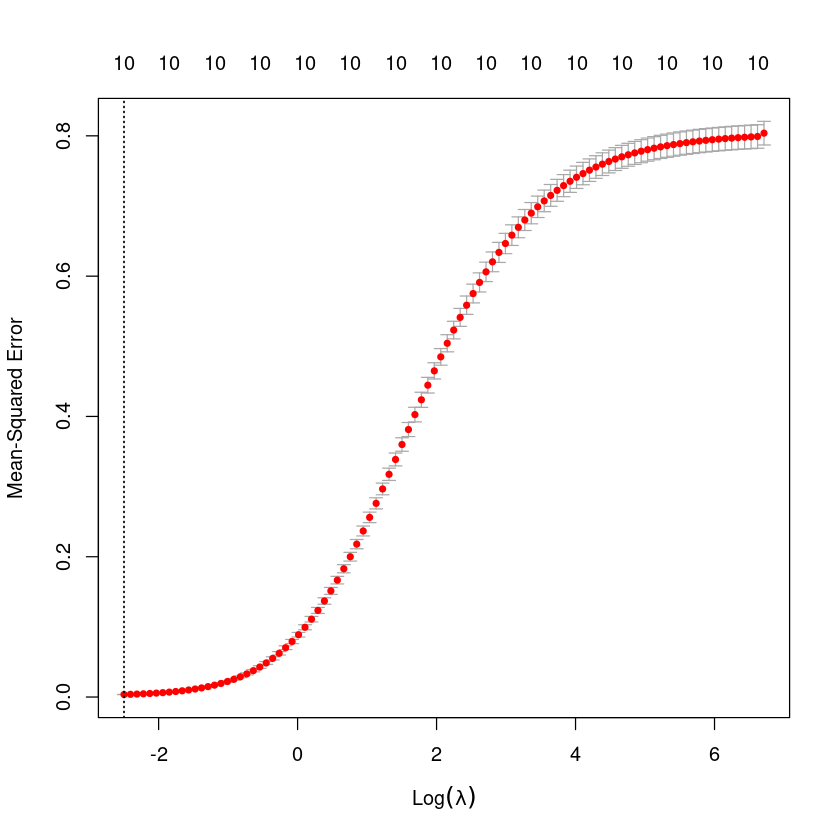

In [52]:
# Convert X to a sparse matrix format expected by glmnet
X_matrix <- as.matrix(X)

# Fit Ridge regression model
ridge_model <- glmnet(X_matrix, Y, alpha = 0)

set.seed(42) # For reproducibility
cv_ridge <- cv.glmnet(X_matrix, Y, alpha = 0)

# Plot the cross-validation curve
plot(cv_ridge)

In [53]:
lm_model <- lm(Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10, data = data)
summary(lm_model)

Warning message in summary.lm(lm_model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + 
    X10, data = data)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.310e-16 -8.150e-17 -1.610e-17  5.600e-17  4.848e-15 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -6.671e-17  1.667e-17 -4.002e+00 6.76e-05 ***
X1           1.000e+00  9.832e-17  1.017e+16  < 2e-16 ***
X2           5.000e-01  8.374e-17  5.971e+15  < 2e-16 ***
X3           2.000e-01  5.193e-17  3.851e+15  < 2e-16 ***
X4           3.000e-02  7.317e-17  4.100e+14  < 2e-16 ***
X5           3.000e-02  7.208e-17  4.162e+14  < 2e-16 ***
X6           3.000e-02  7.410e-17  4.048e+14  < 2e-16 ***
X7           3.000e-01  7.288e-18  4.116e+16  < 2e-16 ***
X8           1.000e-02  1.278e-17  7.827e+14  < 2e-16 ***
X9           1.000e-02  1.446e-17  6.917e+14  < 2e-16 ***
X10          1.000e-02  4.304e-18  2.323e+15  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resid

### 2. Variance Inflation Factor (VIF)
The Variance Inflation Factor (VIF) quantifies how much the variance of an estimated regression coefficient increases if your predictors are correlated. If no factors are correlated, the VIFs will all be equal to 1.

A VIF value greater than 10 (or sometimes 5, depending on the source) indicates significant multicollinearity that needs to be addressed.

In [54]:
# Assuming 'model' is your lm model in R
library(car)
vif_result <- vif(lm_model)
print(vif_result)

Warning message in summary.lm(object, ...):
“essentially perfect fit: summary may be unreliable”


        X1         X2         X3         X4         X5         X6         X7 
100.136286  64.255920  25.903017  63.348033  68.955147  62.213734   1.004022 
        X8         X9        X10 
  1.004373   1.003741   1.008872 


### 3. Tolerance
Tolerance is the inverse of VIF (1/VIF) and measures the amount of variability of the selected independent variable not explained by the other independent variables. Low tolerance values (close to 0) indicate a high degree of multicollinearity.

### 4. Condition Index
The condition index analyzes the eigenvalues obtained from the decomposition of the predictor matrix. High condition indices (a common threshold is 30 or above) suggest multicollinearity.

In [55]:
# Using the 'lm' model from above and base R functions
model_matrix <- model.matrix(lm_model)
eigenvalues <- eigen(crossprod(model_matrix))$values
condition_index <- sqrt(max(eigenvalues) / eigenvalues)
print(condition_index)

 [1]  1.000000  2.736668  3.460659  3.628893  4.629184  5.868927  6.409022
 [8]  9.483096 41.459522 52.782265 65.348547





```r

```

### 5. Eigenvalue Analysis
Inspecting the eigenvalues of the correlation matrix or the X'X matrix (where X is the matrix of predictors) can also reveal multicollinearity. Small eigenvalues indicate the presence of multicollinearity.

These methods collectively offer a comprehensive approach to diagnosing multicollinearity in your regression analysis. Addressing multicollinearity might involve removing variables, combining variables (e.g., creating a single variable from two highly correlated variables), or using regularization techniques like Ridge regression that can handle multicollinearity by penalizing large coefficients.